In [1]:
import sys
print(sys.executable)

/Users/mikayla/wallet-wisdom/env-xgboost/bin/python


In [2]:
# dependecies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from xgboost import XGBClassifier

In [3]:
# for all my plots
palette = ['#8F87B4', '#54724A', '#587958', '#ABCCA5', '#B1C7A4', '#7EA874', '#C3BAD9', '#BE8CC9', '#C588E1', '#c2c1e3']
customCmap = ListedColormap(palette)

In [4]:
data = pd.read_csv('personalFinanceDataset.csv')
data.head()

,Unnamed: 0,age,gender,raceEthnicity,education,region,householdType,householdSize,career,workArrangement,...,totalExpenses,totalSavingsInvestments,monthlyCashFlow,housingRatio,debtToIncome,savingsInvestmentsRate,carPaymentRatio,monthsSaved,financialHealth,ageCategory
0,0,35,Female,White,High School,South,DINKS,2,Retail,Office,...,5368.49,143.09,-2949.78,66.32,1.33,5.59,0.00,1.17,FinanciallyDistressed,30-35
1,1,65,Female,Black/African American,High School,South,Single,1,Retired,Retired,...,5258.28,0.00,-169.98,25.51,25.51,0.00,13.95,0.07,FinanciallyDistressed,60-65
2,2,50,Male,Other/Multiracial,Bachelor's,Midwest,SingleParent,3,Healthcare,Office,...,6578.61,0.00,-1780.63,37.63,11.88,0.00,8.04,0.93,FinanciallyDistressed,45-50
3,3,40,Female,White,Bachelor's,West,Single,1,Sales,Office,...,7676.07,954.95,-598.56,28.46,14.87,11.89,11.36,1.17,FinanciallyStable,35-40
4,4,30,Male,Black/African American,Some College/Associate's,Midwest,SmallFamily,4,Service,Office,...,7640.68,254.91,-5375.15,57.12,27.03,10.11,15.16,1.37,FinanciallyDistressed,25-30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3500 non-null   int64  
 1   age                         3500 non-null   int64  
 2   gender                      3500 non-null   object 
 3   raceEthnicity               3500 non-null   object 
 4   education                   3500 non-null   object 
 5   region                      3500 non-null   object 
 6   householdType               3500 non-null   object 
 7   householdSize               3500 non-null   int64  
 8   career                      3500 non-null   object 
 9   workArrangement             3500 non-null   object 
 10  annualIncome                3500 non-null   float64
 11  sideHustleIncome            3500 non-null   float64
 12  monthlyIncome               3500 non-null   float64
 13  housingStatus               3500 

In [6]:
data = data.drop(['Unnamed: 0'], axis=1)

In [7]:
data.head()

,age,gender,raceEthnicity,education,region,householdType,householdSize,career,workArrangement,annualIncome,...,totalExpenses,totalSavingsInvestments,monthlyCashFlow,housingRatio,debtToIncome,savingsInvestmentsRate,carPaymentRatio,monthsSaved,financialHealth,ageCategory
0,35,Female,White,High School,South,DINKS,2,Retail,Office,30741.640000,...,5368.49,143.09,-2949.78,66.32,1.33,5.59,0.00,1.17,FinanciallyDistressed,30-35
1,65,Female,Black/African American,High School,South,Single,1,Retired,Retired,61059.581194,...,5258.28,0.00,-169.98,25.51,25.51,0.00,13.95,0.07,FinanciallyDistressed,60-65
2,50,Male,Other/Multiracial,Bachelor's,Midwest,SingleParent,3,Healthcare,Office,57575.730000,...,6578.61,0.00,-1780.63,37.63,11.88,0.00,8.04,0.93,FinanciallyDistressed,45-50
3,40,Female,White,Bachelor's,West,Single,1,Sales,Office,96389.510000,...,7676.07,954.95,-598.56,28.46,14.87,11.89,11.36,1.17,FinanciallyStable,35-40
4,30,Male,Black/African American,Some College/Associate's,Midwest,SmallFamily,4,Service,Office,30245.270000,...,7640.68,254.91,-5375.15,57.12,27.03,10.11,15.16,1.37,FinanciallyDistressed,25-30


In [8]:
data.isnull().sum()

age                       0
gender                    0
raceEthnicity             0
education                 0
region                    0
                         ..
savingsInvestmentsRate    0
carPaymentRatio           0
monthsSaved               0
financialHealth           0
ageCategory               0
Length: 69, dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(3500, 69)

In [11]:
# making all categorical values numerical => correlation table (one hot encoding)
ohe_gender = pd.get_dummies(data.gender)
ohe_raceEthnicity = pd.get_dummies(data.raceEthnicity)
ohe_education = pd.get_dummies(data.education)
ohe_region = pd.get_dummies(data.region)
ohe_householdType = pd.get_dummies(data.householdType)
ohe_career = pd.get_dummies(data.career)
ohe_workArrangement = pd.get_dummies(data.workArrangement)
ohe_housingStatus = pd.get_dummies(data.housingStatus)

In [12]:
data = pd.concat([data, ohe_gender, ohe_career, ohe_education, ohe_householdType, ohe_housingStatus, ohe_raceEthnicity, ohe_region, ohe_workArrangement], axis='columns')
data.head()

,age,gender,raceEthnicity,education,region,householdType,householdSize,career,workArrangement,annualIncome,...,White,Midwest,Northeast,South,West,Hybrid,Office,PartTime,Remote,Retired
0,35,Female,White,High School,South,DINKS,2,Retail,Office,30741.640000,...,True,False,False,True,False,False,True,False,False,False
1,65,Female,Black/African American,High School,South,Single,1,Retired,Retired,61059.581194,...,False,False,False,True,False,False,False,False,False,True
2,50,Male,Other/Multiracial,Bachelor's,Midwest,SingleParent,3,Healthcare,Office,57575.730000,...,False,True,False,False,False,False,True,False,False,False
3,40,Female,White,Bachelor's,West,Single,1,Sales,Office,96389.510000,...,True,False,False,False,True,False,True,False,False,False
4,30,Male,Black/African American,Some College/Associate's,Midwest,SmallFamily,4,Service,Office,30245.270000,...,False,True,False,False,False,False,True,False,False,False


writing down some things i want to explore
 1. want to see correlations in different categories
 - more specific one : debt & discretionary
 2. want to see feature importance (which feature has the biggest impact on financial status)
 3. think wanted to learn xg boost model - def want to build a model anyway to simulate real people
 - wanna experiment on lesser features used to train; bc not everyone would have all these numbers ready to go
 4. are there any instances that break the original proportions

In [13]:
df = data[['studentLoans', 'entertainment', 'hobbies', 'travel', 'gifts', 'donations', 'ccPayment', 'personalLoans', 'medicalDebt']].copy()
df.head()

,studentLoans,entertainment,hobbies,travel,gifts,donations,ccPayment,personalLoans,medicalDebt
0,0.0,100.49,0.00,29.91,104.82,0.0,33.95,0.00,0.0
1,0.0,69.68,15.04,52.88,51.07,0.0,588.29,0.00,0.0
2,0.0,43.27,89.37,84.82,105.51,0.0,11.58,172.32,0.0
3,231.8,147.07,0.00,248.83,129.29,0.0,49.99,0.00,0.0
4,0.0,67.81,45.34,25.03,32.54,0.0,299.09,0.00,0.0


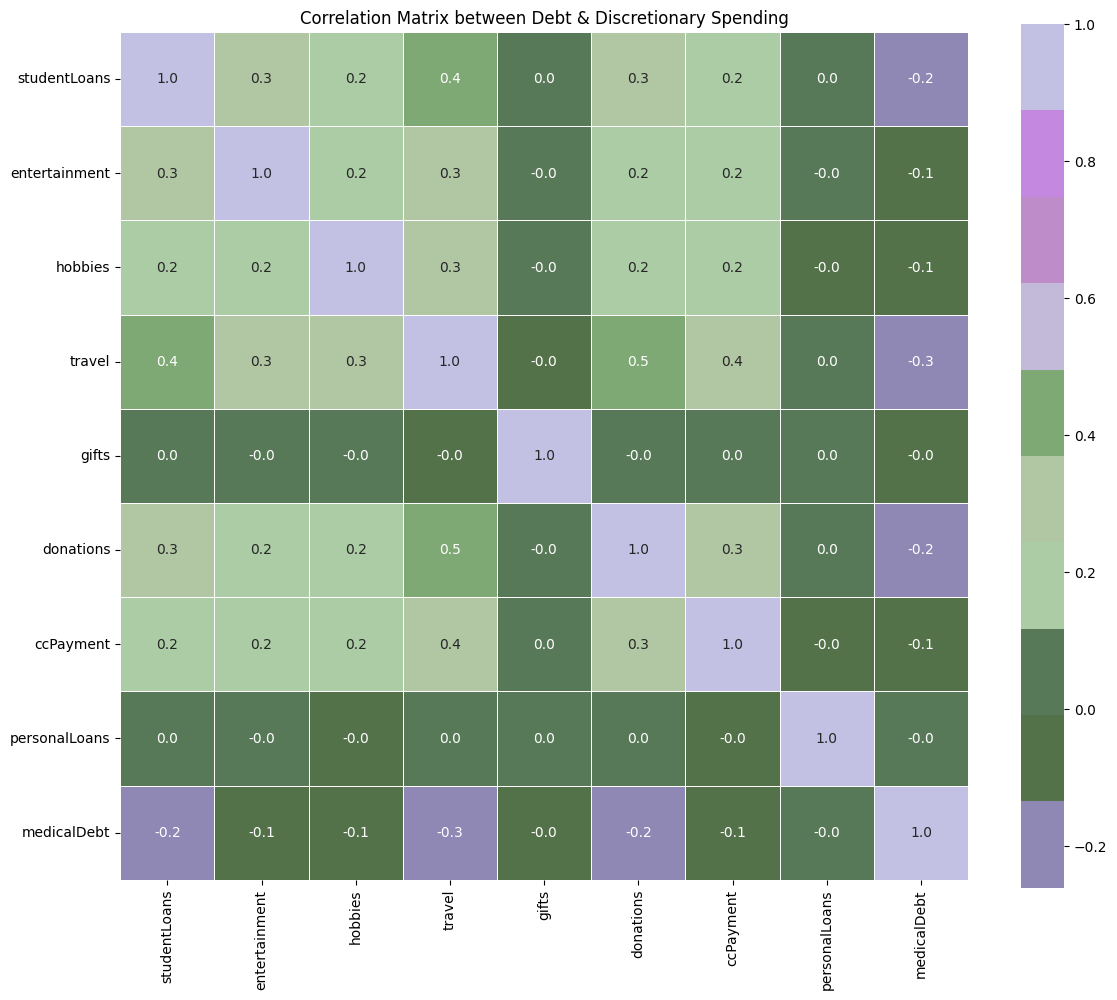

In [14]:
correlationMatrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlationMatrix, annot=True, cmap=customCmap, 
            fmt='.1f', square=True, linewidths=0.5)
plt.title('Correlation Matrix between Debt & Discretionary Spending',)
plt.tight_layout()
plt.show()

In [15]:
# creating some cross tables
crosstab01 = pd.crosstab(data['career'], data['financialHealth'])
crosstab02 = pd.crosstab(data['financialHealth'], data['householdType'])
crosstab03 = pd.crosstab(data['ageCategory'], data['career'])
crosstab04 = pd.crosstab(data['financialHealth'], data['career'])
crosstab04

career,Admin,Business,Construction,Education,Engineering,Finance,FoodService,Healthcare,Legal,Manufacturing,PartTime,Research,Retail,Retired,Sales,Service,Technology,Transportation
financialHealth,,,,,,,,,,,,,,,,,,
FinanciallyDistressed,183,46,88,51,16,12,197,170,1,188,36,0,355,81,83,61,24,112
FinanciallyStable,12,58,4,35,57,50,0,46,11,11,0,1,0,7,30,0,78,3
FinanciallyThriving,0,11,0,7,19,18,0,9,4,0,0,3,0,2,3,0,35,0
FinanciallyVulnerable,116,86,59,100,68,73,34,192,8,126,10,8,83,48,108,24,87,52


<Axes: xlabel='financialHealth'>

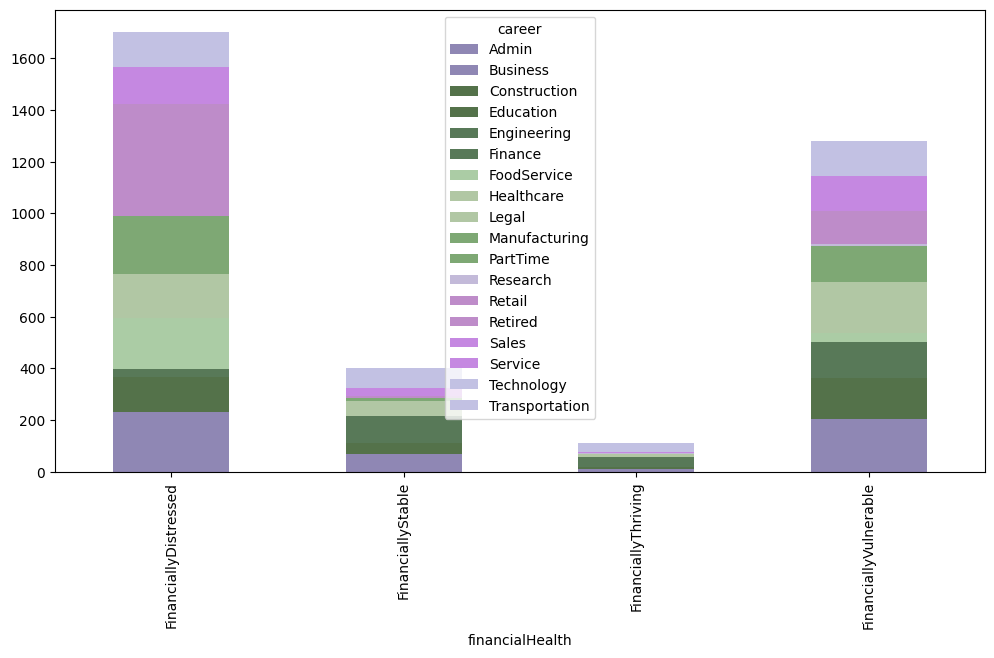

In [16]:
crosstab04.plot(kind='bar', stacked=True, colormap=customCmap, figsize=(12, 6))

In [17]:
# about to begin process of using xgboost vastly for feature importance data
# must first label encode y variable
le = LabelEncoder()
y = le.fit_transform(data['financialHealth']) # works for the target variable, not for features

In [18]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           3500 non-null   object
 1   raceEthnicity    3500 non-null   object
 2   education        3500 non-null   object
 3   region           3500 non-null   object
 4   householdType    3500 non-null   object
 5   career           3500 non-null   object
 6   workArrangement  3500 non-null   object
 7   housingStatus    3500 non-null   object
 8   financialHealth  3500 non-null   object
 9   ageCategory      3500 non-null   object
dtypes: object(10)
memory usage: 273.6+ KB


In [19]:
# test train split
x = data.drop(['gender','raceEthnicity', 'education', 'region', 'householdType',
              'career', 'workArrangement', 'housingStatus', 'financialHealth',
              'ageCategory'], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
yTrain = yTrain.flatten()
yTrain.shape

(2800,)

In [21]:
xTrain = xTrain.astype('float32').values
xTest = xTest.astype('float32').values
yTrain = yTrain.astype('int')

In [22]:
# model
model = XGBClassifier(random_state=42, n_estimators=100, max_depth=4)
model.fit(xTrain, yTrain)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[typing.Callable, str]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [23]:
# evaluate
yPred = model.predict(xTest)
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       321
           1       0.86      0.83      0.84        87
           2       0.88      0.65      0.75        23
           3       0.93      0.98      0.95       269

    accuracy                           0.95       700
   macro avg       0.92      0.86      0.88       700
weighted avg       0.95      0.95      0.95       700



In [24]:
print(le.classes_)

['FinanciallyDistressed' 'FinanciallyStable' 'FinanciallyThriving'
 'FinanciallyVulnerable']
